# 11 Solution

## Setup

**Instructions:** Start by loading the necessary libraries and the following time series `data`. 

**Hint:** For better scrolling, it is advantageous to hide the overly long cells in the section "Setup". To do this, click on the arrow in the left margin next to the section title.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras import Model
from keras.constraints import Constraint
from keras.initializers import Initializer
from keras.models import Sequential
from keras.layers import Layer, Conv1D, Concatenate
from scipy import signal
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.array([-1.22732648e-01,  6.13574933e-03,  1.75762067e-02,  7.35490612e-01,
       -1.50343215e-01,  2.99211836e-01,  2.74345449e-01,  8.09503819e-01,
        1.55751520e+00,  5.58439585e-01,  1.49794486e+00,  7.60890217e-01,
        6.13349556e-01,  1.56110798e+00,  1.20435933e+00,  1.19825683e+00,
        1.18385999e+00,  1.21050757e+00,  3.63469222e-01,  4.54990675e-01,
        4.71502030e-01,  5.45716854e-01,  1.29703160e+00,  2.09377835e-01,
       -1.28408711e+00, -1.89773854e-01,  4.33752544e-01, -9.52723394e-01,
        2.70236772e-01, -2.43269772e-01, -8.16104738e-01, -6.66278058e-01,
       -5.62633422e-01, -7.60839989e-02, -3.14470883e-01, -1.98763223e+00,
       -1.72312827e+00, -1.69106790e+00, -5.46240950e-01, -1.29588941e+00,
       -1.45761743e+00, -1.22298142e+00, -8.20274160e-01, -2.03003033e-01,
       -5.37352371e-01, -9.00742223e-01, -6.04136553e-01, -8.60623905e-02,
        1.93621362e-01, -2.02242619e-01, -9.85435156e-01,  7.09983025e-01,
        2.56216848e-01, -1.50961624e-02,  1.23102923e+00, -1.97611121e-01,
        7.41418540e-01,  5.80508979e-02,  9.30327668e-01,  7.95699084e-01,
        1.12058049e+00,  1.10398573e+00,  3.31085363e-01,  1.24041673e+00,
        1.03774675e-01,  1.32720734e+00,  6.66367775e-01,  1.39794496e+00,
        3.90953940e-01,  8.93625972e-01, -4.11078134e-02,  1.40915797e+00,
        1.15538004e+00,  3.52957353e-02, -1.84093402e-01, -6.69151612e-01,
       -4.05850727e-01, -3.84294032e-01, -1.14478562e-01,  8.16795152e-02,
       -9.29014545e-01,  1.58937410e-01, -1.00418020e+00, -1.38766057e-01,
       -6.40561876e-01,  2.28527468e-01, -7.77667661e-01, -1.01909682e+00,
       -9.15693979e-01, -1.54509601e+00, -6.86079595e-01, -1.28787731e+00,
       -1.00337992e+00, -4.51560007e-01, -2.65682026e-01, -5.30717743e-02,
       -1.04486892e+00,  1.57664435e-01, -1.98350732e-02, -7.33327772e-02,
       -1.35204591e-01,  1.02051793e+00,  7.41563947e-01, -7.59789994e-01,
       -3.03338738e-02,  8.34141283e-01,  9.68924099e-01,  9.41688715e-01,
        1.02607252e+00,  3.85407974e-01,  8.17897445e-01,  9.23791024e-01,
        1.22518761e+00,  7.73820613e-01,  1.07532815e+00,  1.19781029e+00,
        4.48768245e-01,  1.33609153e+00,  8.55898581e-01,  1.91818656e-01,
       -3.32554677e-01,  3.31156440e-02,  3.34318968e-01, -5.27954642e-01,
       -9.11100621e-02,  1.54244813e-01,  2.53735235e-01, -7.92271507e-01,
       -1.58834942e-01,  2.09037109e-01,  1.96168432e-01, -1.24552027e+00,
       -8.71566760e-01, -1.27810210e+00, -1.38491741e+00, -7.51608041e-01,
       -7.11213007e-01, -1.40798023e+00,  6.30227659e-02, -1.44988658e+00,
       -1.02734072e+00, -1.48617376e+00, -1.16938753e-01, -1.37819894e+00,
       -6.06049933e-01, -5.11536927e-01,  7.73634018e-02, -5.86903413e-01,
        3.51682782e-01, -1.06953535e-01,  4.71419612e-01,  7.61619203e-01,
        3.27533731e-01,  1.22843906e-01, -4.12776426e-01, -8.21706918e-02,
        5.77600337e-01,  6.74219192e-01,  4.40739896e-01,  5.91987843e-01,
        8.49669352e-01,  5.56815508e-01,  7.85676336e-01,  1.05932598e+00,
        1.43418404e+00,  1.88520330e+00,  5.41063839e-01,  7.51722177e-01,
        6.29058694e-01,  4.67343487e-01,  6.23188458e-01,  6.56012132e-01,
        7.09719101e-03,  7.68964097e-02, -5.03618150e-02,  3.05095395e-01,
       -6.18881188e-01, -1.26389907e+00, -3.65161112e-01, -8.53729125e-01,
       -4.76952106e-01,  2.47880365e-01, -8.06416978e-01, -1.35418412e+00,
       -5.39001321e-01,  6.07337646e-02, -7.25218716e-01, -1.34281462e+00,
       -1.23667183e+00, -7.06463737e-01, -1.31192614e+00, -6.63658762e-01,
       -1.08294332e+00, -1.33386868e+00, -6.04853731e-02, -1.81486143e-01,
       -2.46832879e-01, -1.37393784e-01, -1.49636421e-01,  6.15895140e-02,
       -7.39570205e-01,  5.83467112e-01,  7.13336803e-01,  1.10918063e+00,
        1.19578795e-01,  9.92970663e-01,  9.74305359e-01,  7.45228144e-01,
        4.96006553e-01,  8.69229468e-01,  9.08248534e-01,  8.61201942e-02,
        7.28378243e-01,  8.00546773e-01,  1.35280002e+00,  7.12793942e-01,
        6.28034132e-01,  1.21585722e+00,  1.01270578e+00,  4.41806583e-01,
        9.79729228e-01,  7.66423936e-01,  1.53069608e-01,  9.57697870e-01,
        4.71460787e-02, -6.98045875e-01, -2.28679547e-01, -5.43460211e-01,
       -2.51986468e-01, -5.32173570e-01,  5.08135291e-02, -7.88204981e-01,
       -9.13371592e-01, -3.47484073e-01, -8.46615555e-01, -5.01702486e-01,
       -1.61278048e+00, -6.17248514e-01, -1.55725409e+00, -5.10071105e-01,
       -8.29849411e-01, -1.03401811e+00, -9.96742752e-01, -4.65722183e-01,
       -7.87346617e-01, -3.33091813e-01, -4.53825644e-01, -3.85655367e-01,
       -1.66549205e-01,  6.10996602e-02, -9.09811598e-01,  6.54008885e-01,
        2.54838545e-01, -3.49084402e-01,  4.89465842e-01,  5.06729139e-01,
        1.31409893e+00,  2.48109028e-01,  6.63395888e-01,  1.50642015e+00,
        8.32334552e-01,  3.37021609e-01, -1.70404858e-02,  4.87942868e-01,
        1.39461791e+00,  9.39432285e-01,  8.47974981e-01,  3.65477414e-01,
        5.80507860e-01,  2.52886483e-01,  5.80777300e-01,  5.06197402e-01,
        2.91678412e-01,  1.49880794e-01, -3.79317484e-01,  4.54577090e-01,
        2.97607572e-02, -4.77894042e-01,  1.98342549e-01, -5.30245586e-01,
       -1.27390150e-01, -7.28381751e-01, -1.74931368e+00, -5.51901448e-01,
       -1.84221921e+00, -1.50988748e-01, -3.94371663e-01, -6.82252247e-01,
       -5.49464968e-01, -1.03930755e+00, -1.27863880e+00, -1.20912358e+00,
       -4.14899047e-01, -9.84827056e-01, -2.87639782e-01, -1.11411739e+00,
       -4.15511775e-01, -2.23590319e-01, -2.71417342e-01,  1.12915785e-01,
       -7.08323554e-02,  6.31993818e-01, -2.99745797e-01,  3.90965329e-01,
        3.04560856e-01, -4.68027492e-01,  1.06677543e+00,  3.91825916e-01,
        5.07637390e-01,  8.39460779e-02,  1.85866312e+00,  9.23234138e-01,
        8.76781259e-01,  9.72297215e-01,  1.74159836e+00,  1.16590710e+00,
        8.50006530e-01,  2.07008728e-01,  1.03028053e+00,  9.42872931e-01,
        3.98783801e-01,  8.07972419e-01,  6.96766646e-02,  1.12297694e-01,
       -9.16258784e-03,  9.28046008e-01,  3.02307151e-02, -1.65045946e-01,
        1.43108887e-01, -5.31118603e-01, -4.91041735e-01, -4.35318544e-01,
       -9.23335974e-01, -1.38943332e+00, -9.55506523e-01, -2.11047248e+00,
       -1.44988090e+00, -1.11523777e+00, -1.12228083e+00, -9.92762633e-01,
       -9.38089921e-01, -6.09073999e-01, -1.75240688e+00, -3.53566766e-01,
       -2.60527502e-01, -8.58813631e-01,  1.87472460e-01, -1.95602911e-01,
       -4.00270248e-01,  2.29842582e-01, -7.28460110e-01,  2.44831429e-02,
       -7.20904630e-02, -1.38656270e+00, -6.89148535e-01, -5.34725546e-01,
       -9.22956478e-01, -1.52575887e+00, -1.43512804e+00, -5.63747811e-01,
       -1.03302615e+00, -1.61424716e+00, -4.65091915e-01, -8.97554574e-01,
       -6.16488917e-01, -5.24193887e-02,  6.37676486e-01,  3.40517499e-01,
        2.84692120e-01,  1.87882167e-01,  8.21762363e-01,  5.80503470e-01,
        1.63417266e+00,  1.89902278e+00,  1.41408979e+00,  1.59830645e+00,
        1.36940678e+00,  1.09305770e+00,  2.27850055e+00,  2.12073177e-01,
        9.06697222e-01,  4.80010777e-01,  7.32129835e-01,  4.75504927e-01,
        6.43491675e-01, -7.25313578e-01, -4.63337937e-02, -1.36415826e+00,
       -1.69976843e+00, -3.13199873e-01, -1.14961922e+00, -8.39020750e-01,
       -6.76336645e-01, -1.37896458e+00, -1.32418497e+00, -1.18510859e+00,
       -3.61644227e-01, -3.53442821e-01,  1.64150011e-01,  5.74799917e-01,
        2.69178316e-01,  1.80106634e-01,  9.36550750e-02,  5.59511740e-01,
        1.59302889e-01,  4.93005396e-01,  1.14260210e+00,  6.21793175e-01,
       -1.64658033e-01,  4.78975675e-01,  1.09768781e+00,  1.24616728e+00,
        8.15716756e-01,  4.25181019e-01, -2.25354019e-01,  3.09331888e-01,
       -8.11386010e-01, -4.48251791e-01,  3.13352856e-01, -5.34300127e-01,
       -7.83730436e-01, -1.57956546e+00, -1.91495515e+00, -1.65012992e+00,
       -1.91195444e+00, -5.34496573e-01, -1.30174589e+00, -8.37191698e-01,
       -6.10100853e-01, -1.27410188e+00, -1.00101880e+00, -8.39662115e-01,
       -5.69657456e-01,  3.69856389e-01,  7.45624012e-01,  9.28345106e-01,
        2.02827288e-01,  5.78737874e-01,  9.65467579e-01,  4.80438442e-01,
        1.75063061e+00,  1.23314399e+00,  1.34765777e+00,  1.71599050e-02,
        7.02372869e-02, -4.26274442e-01,  1.31568487e+00,  7.05246555e-01,
       -1.70578553e-01,  1.39586410e+00, -7.51610386e-01, -5.89303265e-02,
       -3.14516968e-01, -5.62360088e-01, -8.95371929e-01, -9.17831793e-01,
       -1.62927435e+00, -6.93953326e-01, -1.27410894e+00, -7.17438237e-01,
       -1.16652221e+00, -7.18097332e-01, -1.33318320e+00, -1.22179700e+00,
       -9.12730317e-01, -3.87119710e-01,  3.70074387e-01,  3.79384001e-01,
        4.03518450e-01,  9.43086360e-01,  6.97294831e-01,  9.53761072e-01,
        9.61418145e-01,  7.53629562e-01,  1.06985076e+00,  6.83260770e-01,
        7.43348002e-01,  3.99956025e-01,  6.26869429e-01,  1.56558665e-02,
        8.85918593e-01,  3.94618209e-01,  2.57406435e-01,  2.34332784e-01,
       -9.98817153e-02, -7.61376498e-01,  8.90851948e-01, -2.93082312e-01,
       -9.23045968e-01, -1.20225232e+00, -1.03230897e-01, -1.43890294e+00,
       -6.30037353e-01, -9.30385644e-01, -2.04607213e-01, -2.54914791e-01,
        5.68905546e-01, -1.32323560e+00,  2.71279102e-01, -2.36914865e-01,
        2.91098503e-01,  7.68680400e-01,  1.17396639e+00,  4.31342300e-01,
        2.56842446e-01,  7.92635576e-01,  5.75452572e-01,  2.27671430e-01,
        1.41233112e+00,  1.01847636e+00,  1.38729966e+00,  4.02327394e-01,
        7.14593187e-01, -2.25797896e-01,  2.57084392e-01, -7.64219387e-01,
        6.20712407e-01,  3.81650743e-01, -8.87403318e-01, -7.58499528e-01,
       -3.10462249e-01, -5.07278502e-01, -7.97661342e-01, -7.22123361e-01,
       -1.67279562e+00, -8.36208271e-01, -1.50093257e+00, -7.91904490e-01,
       -2.00832247e-01, -7.04150276e-01, -7.79319394e-01,  1.27970803e-01,
       -1.39214395e-01, -1.86394406e-01,  9.26594255e-02,  1.25664961e+00,
        2.30966731e-01,  1.42103508e+00,  9.60273015e-01,  9.10552338e-01,
        1.00276047e+00,  1.04567445e+00,  2.13273129e-01,  6.56391823e-01,
        1.37964137e+00, -9.60161130e-02,  6.83848338e-01, -5.78159814e-01,
        9.42065954e-01, -2.07812150e-02,  4.58211442e-01, -5.87529074e-01,
       -3.48933460e-01, -1.23419944e+00, -9.39978011e-01, -8.74675956e-01,
       -8.58600214e-01, -4.21152161e-01, -1.04839048e+00, -1.70869004e+00,
       -9.38719361e-01, -2.67911361e-01, -1.06930177e+00, -1.04655016e+00,
       -4.18814306e-01, -6.88631247e-01, -1.83536937e-01, -1.09343746e-01,
        4.25884479e-01,  1.77677973e+00,  6.75698037e-01,  5.16004614e-01,
        3.64604794e-01,  1.00022835e+00,  1.22391513e+00,  1.12502057e+00,
        1.16428711e+00,  1.92609530e+00,  9.46744289e-01,  9.70873710e-01,
        3.85551711e-01,  5.25786235e-01,  4.85307293e-02,  4.39153010e-01,
        4.90936888e-02, -3.53250647e-01, -1.26088970e+00, -5.82847648e-01,
       -1.27798620e+00, -1.79363078e+00, -1.80853850e+00, -3.77087778e-01,
       -7.15140109e-01, -8.86194328e-01, -6.32459426e-01, -1.52724940e+00,
       -4.61557345e-01,  8.38459886e-02, -6.03694432e-01, -3.43487418e-01,
       -5.39980004e-02, -2.76939180e-01,  1.01028946e+00,  1.27978137e+00,
        1.76022543e+00,  1.34120286e+00,  7.28700618e-01,  1.21969175e+00,
        4.53426971e-01,  7.62175049e-01,  6.73432315e-01,  2.09761614e-01,
        8.38491145e-01, -1.02198522e-02,  6.15294408e-01,  3.44987935e-01,
        3.53442201e-01,  5.86389484e-01, -3.79703867e-01, -1.37134413e+00,
       -4.26885635e-01, -1.33097475e+00, -9.35806949e-01, -1.14507601e-01,
        6.29937121e-02, -1.33614697e+00, -4.66612003e-01, -6.90828449e-01,
        7.04961948e-02, -4.17439491e-01, -3.89190462e-01,  6.13868267e-02,
       -5.04892031e-01,  4.11309504e-02,  6.39548469e-01,  7.61700929e-01,
        1.62423405e+00,  1.49196700e+00,  1.84241873e+00,  1.00349282e+00,
        4.79797034e-01,  1.56149654e+00,  1.09341804e+00,  8.44285203e-01,
        1.19189511e+00,  1.07279484e+00,  3.19992966e-01,  1.50214029e-01,
        6.96170998e-02,  6.61082050e-01, -4.22390266e-01, -4.64872856e-01,
       -1.12311948e+00, -8.42067433e-01, -8.57257796e-01, -4.62080464e-01,
       -1.49180307e+00, -6.90912618e-01, -4.28826768e-01, -8.29136525e-01,
       -1.29321415e+00, -1.53321213e+00, -8.22094720e-02, -1.24949838e-01,
        5.89683507e-01, -5.39190898e-01, -5.33956326e-01,  8.23437275e-01,
       -2.58292350e-02,  9.39902446e-01,  3.50982180e-01,  5.67807861e-01,
        8.76216551e-01,  1.31837627e+00,  1.36026394e+00,  6.88660604e-01,
        2.01437104e+00,  1.72277019e+00,  1.38765826e+00,  1.34685056e+00,
        7.88418367e-01, -4.44968829e-02,  7.73842072e-01,  1.02979929e-01,
        1.12926186e-01,  3.48442811e-01, -1.53192629e+00,  4.22291121e-01,
       -1.13388613e+00, -9.00873675e-01, -9.24638487e-01, -6.69898768e-01,
       -1.42192748e+00, -2.59511588e-01, -1.54554935e+00, -1.06060172e+00,
       -7.25749010e-03, -5.58808154e-01,  6.54186631e-01,  8.09811586e-01,
       -1.27748234e-01,  4.44593776e-01,  4.17782769e-01,  6.75818209e-01,
       -6.01891784e-02,  1.06927548e+00,  1.64735222e+00,  2.09384977e+00,
        5.83666484e-01,  8.62503584e-01,  5.41489358e-01,  2.08848268e-01,
        8.40800173e-01,  8.67138969e-01,  3.82747707e-01,  2.73503950e-01,
        1.77090021e-01, -2.68164598e-01,  7.87982894e-01, -8.79857410e-01,
       -9.01572905e-01, -8.15293748e-01, -8.37083355e-01, -1.54036726e+00,
       -3.62244005e-01, -1.67428608e+00, -4.44395441e-01, -5.85198496e-01,
       -4.78738856e-01, -5.08171321e-01, -8.99605968e-01, -1.09451445e-01,
       -5.94156741e-01,  7.23080481e-01,  2.60742255e-01, -1.19360631e-01,
        1.54678922e+00, -1.25645283e-01,  8.99542809e-01,  1.63303370e+00,
        1.19707346e+00,  1.28096917e+00,  1.80639787e+00,  9.24033236e-01,
        5.32490434e-01,  9.35122609e-01,  1.40559352e+00,  1.10848268e-01,
        6.20973952e-01,  7.16276409e-01,  5.73686156e+00, -5.83861967e+00,
       -1.08611796e+00, -9.83098912e-01, -3.12245929e-01, -8.62167123e-02,
       -8.77532530e-01, -8.61785824e-01, -2.05182341e+00, -2.08698492e+00,
       -1.26577705e+00, -1.47651749e+00, -8.53580197e-01, -1.49738931e-01,
       -8.38461408e-02, -6.60678862e-01,  3.50842065e-01,  8.02916846e-01,
        5.77545017e-03,  8.87344247e-01,  7.19684487e-01,  3.76159356e-01,
        4.45351292e-01,  1.09047955e+00,  1.47793347e+00,  1.71374027e+00,
       -2.57994577e-01,  9.48463294e-01,  9.78547421e-01,  9.71472343e-01,
        5.95572811e-01,  9.82862598e-02,  1.07323233e-01, -1.32279020e-02,
        7.19548315e-02, -6.78940360e-01, -1.33571346e+00, -1.56730097e-01,
       -1.43310516e-01, -5.22513264e-01, -5.63040362e-01, -1.03811461e+00,
       -2.62768988e-01, -4.60433456e-01, -1.48920817e+00, -3.68282026e-01,
       -9.48318463e-01, -8.31769550e-01, -8.79339673e-01, -3.66314338e-01,
        4.12893210e+00, -4.16791687e+00, -4.81383360e-02,  2.31286918e-01,
        7.00607225e-01,  9.14002951e-01,  7.59849761e-01,  9.16256687e-01,
        1.05586758e+00,  1.52228564e-01,  1.31764519e+00,  8.40611673e-01,
        1.86610408e-01,  8.08758204e-01, -4.38213298e-01,  1.80624062e-01,
       -4.01814818e-01, -4.76945698e-01, -4.44508314e-02, -1.12058287e+00,
       -7.27469790e-01, -4.75330468e-01, -8.30841500e-01, -2.11677941e+00,
       -8.91120587e-01, -6.51522920e-01, -1.58251563e+00, -9.50500327e-01,
       -6.53416852e-02, -1.53994706e+00, -1.00849089e+00, -3.94744672e-01,
        4.99140278e-01, -4.05454418e-01,  1.06293758e+00,  8.15626162e-01,
        3.09960469e-01,  1.32059010e+00,  1.04927845e+00,  9.45650113e-01,
        8.27574906e-01,  1.10537800e+00,  1.25559229e+00,  3.97104132e-01,
        1.17615545e+00,  2.77013112e-01,  5.22085205e-01,  4.70333772e-01,
        2.04780129e-01, -6.18718841e-01,  1.31317397e-01, -8.58541961e-02,
        2.68032424e-01, -1.21347787e+00, -7.75863032e-01, -1.33629264e-01,
       -8.46687454e-01, -1.13146026e+00, -1.41829751e+00, -1.51148490e+00,
       -5.11537361e-01, -1.14360724e+00, -3.98449173e-01, -1.25333049e+00,
        6.42447534e-01,  3.15951288e-01,  1.13795473e-01,  2.97425748e-01,
        1.47179114e+00,  4.95158398e-01,  7.19654542e-01,  9.51643398e-01,
        1.56539006e+00,  4.58315776e-01,  2.02569182e+00,  8.11390168e-01,
        7.90610802e-01,  1.03645205e+00,  1.24030705e+00,  3.22488998e-01,
        2.80589932e-01,  1.37556827e-01,  7.44110085e-01,  4.51694062e-02,
       -7.61699934e-01, -9.28507823e-01, -5.86804178e-01, -2.24116600e-01,
       -7.69980800e-01, -6.91087025e-01, -7.46603492e-01, -1.03860897e+00,
       -1.97120800e+00, -7.39178576e-01, -5.73423838e-01, -6.09190718e-01,
       -9.73574157e-01,  2.07132198e-01, -3.19653266e-01,  8.71773454e-01,
       -8.13385099e-02,  1.27659786e+00,  4.51385755e-01,  5.61529038e-01,
        8.14795642e-01,  1.27478723e+00,  1.09210203e+00,  6.14439966e-01,
        9.17771627e-01,  1.03214789e+00,  7.26508788e-01,  1.15930934e+00,
        7.50912548e-01,  7.19586502e-01,  4.25855422e-01,  1.59526205e-01,
        8.76775338e-01, -7.45986552e-01, -6.98456884e-01,  2.41475464e-01,
       -4.12416331e-01, -6.22009892e-01, -6.48254933e-01, -4.68442458e-01,
       -9.77230970e-01, -9.61710302e-01, -7.99472328e-01, -7.24238748e-01,
       -6.81049515e-01, -1.22752513e+00, -1.00323314e+00, -1.77467026e-01,
        4.55706412e-01, -7.93596368e-01, -2.85541225e-01,  2.21428178e-01,
        7.07079081e-01,  1.26889507e-01,  1.50629904e+00,  1.28520001e+00,
        1.04087088e+00,  1.46179540e+00,  7.89521793e-01,  8.66182073e-01,
        1.43725009e+00,  1.74255312e+00,  8.95677239e-02,  7.10095455e-01,
        6.90906009e-01,  7.49314766e-02, -4.79473288e-01, -4.39518999e-01,
       -6.22123162e-01, -1.04301241e+00, -1.78189954e+00, -2.98130321e-01,
       -1.47485601e+00, -1.26081460e+00, -1.03780279e+00, -7.96283571e-02,
       -1.37420567e+00, -1.58219799e-01, -6.66948908e-01, -4.36557987e-01,
        2.02434098e-01, -7.85981965e-01,  3.17979621e-01,  7.85614984e-02,
        6.86291618e-01,  1.36706637e+00,  6.10617042e-01,  7.89275741e-01,
        1.71749397e-01,  1.05785397e+00,  1.59507756e+00,  1.31999080e+00,
        8.45063508e-01,  9.51377340e-01,  6.02246800e-01,  8.96294733e-01,
        5.35790171e-01,  5.41036214e-01, -2.38711180e-01,  7.22331520e-01,
       -6.12069743e-01, -4.35871906e-01, -1.04558841e+00, -6.45695838e-01,
       -1.08987689e+00, -1.27118380e+00, -1.21359447e+00, -4.70249449e-01,
       -1.38270200e+00, -1.68296295e-01, -4.25701836e-01, -5.11541560e-01,
       -8.06786923e-01, -5.32659529e-01, -3.58884108e-02,  2.45174459e-01])

## 11.2 Fourier transform

*   What is the fast Fourier transform? 

    * fast Fourier transform is a efficient Fourier transform in discrete time


*   What are the `spectrum` and `powerspectrum`? Are they symmetric, and why would this be the case?

    * specturm: the Fourier coefficients of each frequency

    * powerspecturm: square of specturm

    * they are the symmetric since the data is real valued

*   What are the dominant frequencies of the time series `data`? To give a good answer, you will have to zoom in on the spectral plots by selecting a relevant coordinate range.

    * Shown below, dominant frequencies are 19/1000 and 30/1000, 
    

*   Does the Fourier transform reveal the timing of the pulses, or even their presence? 

    * No

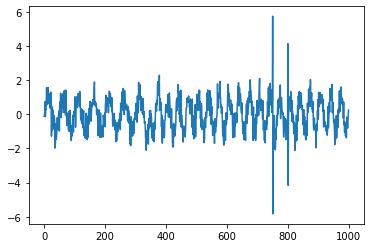

In [3]:
N = np.size(data)
t, dt = np.linspace(0,1, N, retstep=True)
samplingfrequency = 1/dt
fig, ax = plt.subplots()
plt.plot(data)
plt.show()

c:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


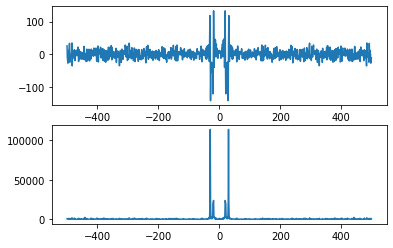

In [4]:
spectrum = fft(data)
powerspectrum = np.abs(spectrum)**2
frequencies = np.fft.fftfreq(N, dt)
idx = np.argsort(frequencies)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(frequencies[idx], spectrum[idx])
ax2.plot(frequencies[idx], powerspectrum[idx])

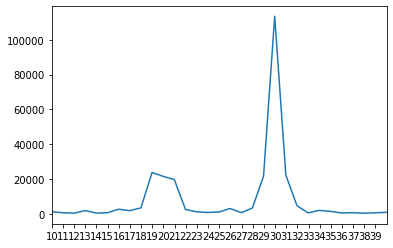

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(10, 40)
ax.set_xticks(range(10,40, 1))
plt.plot(frequencies[idx], powerspectrum[idx])
plt.show()

## 11.3 Short-time Fourier transform

*   What is the short-time Fourier transform `stft`?

    * stft applies Fourier transform in a moving small time interval

*   What do the plots show, what is the meaning of the coordinate axes, and how many data points are available for each axis?

    * the plot sho the pattern as a result of number of data points within a time interval

    * horizontal axis: time, and vertical axis: frequency

    * number of data points, as shown below

*   How does the frequency composition change over time? Do you see the same dominant frequencies here as before?

    * as time decreases, the pattern grew unclear

    * in the first few, yes we can

*   The signal contains two high-frequency pulses. Find out at what times they occured. For this, you will have to zoom in on the plot and tune the parameter `nperseg`, which describes the number of data points within the time window. 

    * as shown below

freq: 6 time: 201
freq: 16 time: 68
freq: 46 time: 24
freq: 136 time: 9


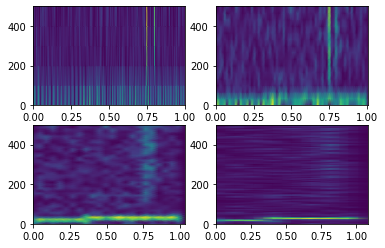

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

frequencies, times, spectrum = signal.stft(data, samplingfrequency, nperseg=10)
print("freq:", len(frequencies), "time:", len(times))
ax1.pcolormesh(times, frequencies, np.abs(spectrum), shading='gouraud')

frequencies, times, spectrum = signal.stft(data, samplingfrequency, nperseg=30)
print("freq:", len(frequencies), "time:", len(times))
ax2.pcolormesh(times, frequencies, np.abs(spectrum), shading='gouraud')

frequencies, times, spectrum = signal.stft(data, samplingfrequency, nperseg=90)
print("freq:", len(frequencies), "time:", len(times))
ax3.pcolormesh(times, frequencies, np.abs(spectrum), shading='gouraud')


frequencies, times, spectrum = signal.stft(data, samplingfrequency, nperseg=270)
print("freq:", len(frequencies), "time:", len(times))
ax4.pcolormesh(times, frequencies, np.abs(spectrum), shading='gouraud')

plt.show()

## 11.4 Wavelet analysis

*   What is the continuous wavelet transform `cwt`?
*   What is the meaning of the two axes of the plot, how many data points are available for each axis, and what is represented by the color-coding?
*   Zoom in on the plot to read off the base frequencies and the times of the pulses.
*   Read the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.morlet2.html) of `morlet2` to find out the meaning of its parameters `M`, `s`, and `w`.
*   Read the [implementation](https://github.com/scipy/scipy/blob/v1.9.2/scipy/signal/_wavelets.py#L389-L471) of `cwt` to find out what parameters `M`, `s`, and `w` are used by `cwt`. In particular, find out how `M` is chosen depending on `s`.

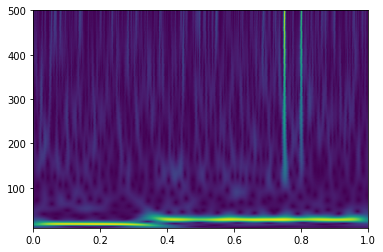

In [6]:
frequencies = np.linspace(10, 500, 400)
times = np.linspace(0,1, N)
widths = 6 * samplingfrequency / (2*frequencies*np.pi)
cwtm = signal.cwt(data, signal.morlet2, widths, w=6)
plt.pcolormesh(times, frequencies, np.abs(cwtm), shading='gouraud')
plt.show()

## 11.5 Wavelet analysis using neural networks

*   Describe what the following code does and how it works. 
*   Experiment with the parameter `kernel_size`. How is it chosen here, and for comparison, how is it chosen by `cwt`?
*   When training the network, what coefficients would be changed, and what does this mean from a harmonic analysis perspective?



1/1 [==============================] - 0s 499ms/step


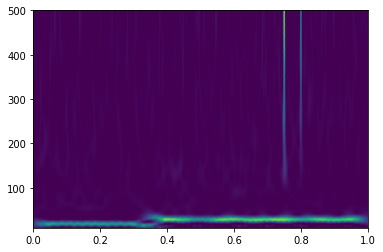

In [7]:
class MorletInitializer(Initializer):

    def __init__(self, widths=None, real=True):
      self.widths = tf.convert_to_tensor(widths)
      self.real = real

    def __call__(self, shape, dtype=None):
      if self.widths.shape != shape[1:]:
            raise ValueError(
                "The widths parameter must have shape {} but has shape {}".format(
                    shape[1:], self.widths.shape))
      kernel_size = shape[0]
      if self.real:
          def morlet(w):
            kernel = signal.morlet2(shape[0], w.numpy(), w=6.)
            return tf.cast(kernel.real, dtype)
      else:
          def morlet(w):
            kernel = signal.morlet2(shape[0], w.numpy(), w=6.)
            return tf.cast(kernel.imag, dtype)
      signature = tf.TensorSpec(shape=[kernel_size], dtype=dtype)
      kernel = tf.map_fn(
          morlet, 
          tf.reshape(self.widths, [-1]),
          fn_output_signature=signature)
      kernel = tf.reshape(tf.transpose(kernel), shape)
      return kernel

    def get_config(self):  
      return {'widths': self.widths, 'real': self.real}

frequencies = np.linspace(10,500, 400)
widths = [6 * samplingfrequency / (2*frequencies*np.pi)]
input = Input(shape=(1000,1))
morlet_real = Conv1D(
    filters=400, 
    kernel_size=100, 
    use_bias=False, 
    padding='same',
    kernel_initializer=MorletInitializer(widths, real=True))
morlet_imag = Conv1D(
    filters=400, 
    kernel_size=100, 
    use_bias=False, 
    padding='same',
    kernel_initializer=MorletInitializer(widths, real=False))
output = Concatenate()([morlet_real(input), morlet_imag(input)])
morlet_layer = Model(input, output)
model = Sequential()
model.add(morlet_layer)
cwtm = model.predict(np.reshape(data,[1,1000,1]))
cwtm = cwtm.reshape(1000,2,400)
cwtm = np.sum(cwtm**2,axis=1)
cwtm = cwtm.transpose()
plt.pcolormesh(t, frequencies, cwtm, shading='gouraud')

## 11.6 Learning the scale parameter in wavelet analysis

The following code is adapted from an [implementation](https://github.com/haidark/WaveletDeconv) of a [NeurIPS paper](https://proceedings.neurips.cc/paper/2018/file/1a3f91fead97497b1a96d6104ad339f6-Paper.pdf) by Khan and Yener.

*   Describe the network architecture: how is the output computed from the input, and what are the trainable weights?
*   What is the Mexican Hat wavelet, and how does it compare to the Morlet wavelet?
*   How does this architecture compare to the one in Problem 11.5? Specifically, are there more or less trainable weights, and does the wavelet analysis operator depend linearly or nonlinearly on the weights?
*   Do you think this architecture will perform well? What are the pros and cons?

In [8]:
class Pos(Constraint):

    def __call__(self, p):
        p *= K.cast(p > 0., K.floatx())
        return p

class WaveletAnalysis(Layer):
    
    def __init__(self, num_kernels, kernel_length=100,
                 activation='linear', weights=None, 
                 input_shape=None, **kwargs):

        self.num_kernels = num_kernels
        self.kernel_length = kernel_length
        self.init = self.guess 
        self.activation = keras.activations.get(activation)
        self.padding = 'same'
        self.kernel_constraint = Pos()
        self.initial_weights = weights
        super(WaveletAnalysis, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dim = input_shape[1]
        self.input_length = input_shape[2]
        self.W_shape = (self.num_kernels)
        self.W = self.init(self.W_shape, name='{}_W'.format(self.name))
        self._trainable_weights = [self.W]
        super(WaveletAnalysis, self).build(input_shape)
        
    def call(self, x, mask=None):
       
        # build the kernels to convolve each input signal with
        kernel_length = self.kernel_length
        T = (np.arange(0,kernel_length) - (kernel_length-1.0)/2).astype('float32')
        T2 = T**2
        # helper function to generate the Mexican hat wavelet for a given width
        def gen_kernel(w):
            w2 = w**2
            B = (3 * w)**0.5
            A = (2 / (B * (np.pi**0.25)))
            mod = (1 - (T2)/(w2))
            gauss = tf.exp(-(T2) / (2 * (w2)))
            kern = A * mod * gauss
            kern = tf.reshape(kern, (kernel_length, 1))
            return kern
        wav_kernels = []
        for i in range(self.num_kernels):
            kernel = gen_kernel(self.W[i])
            wav_kernels.append(kernel)
        wav_kernels = tf.stack(wav_kernels, axis=0)
        wav_kernels = tf.expand_dims(wav_kernels, 0)
        wav_kernels = tf.transpose(wav_kernels,(0, 2, 3, 1))               

        # reshape input so number of dimensions is first (before batch dim)
        x = tf.transpose(x, (1, 0, 2))
        def gen_conv(x_slice):
            x_slice = tf.expand_dims(x_slice,1) # shape (num_batches, 1, input_length)
            x_slice = tf.expand_dims(x_slice,2) # shape (num_batches, 1, 1, input_length)
            return keras.backend.conv2d(x_slice, wav_kernels, strides=(1,1), padding='same', data_format='channels_first')
        outputs = []
        for i in range(self.input_dim):
            output = gen_conv(x[i,:,:])
            outputs.append(output)
        outputs = tf.stack(outputs, axis=0)
        outputs = tf.squeeze(outputs, 3)
        outputs = tf.transpose(outputs, (1, 0, 3, 2))
        return outputs
                
    def compute_output_shape(self, input_shape):
        out_length = keras.utils.conv_output_length(
            input_shape[2], self.kernel_length, 'same', 1)        
        return (input_shape[0], self.input_dim, out_length, self.num_kernels)
    
    def guess(self, shape, name=None):
        x = 2**np.arange(shape).astype('float32')
        return tf.Variable(initial_value=x, name=name)

1/1 [==============================] - 4s 4s/step


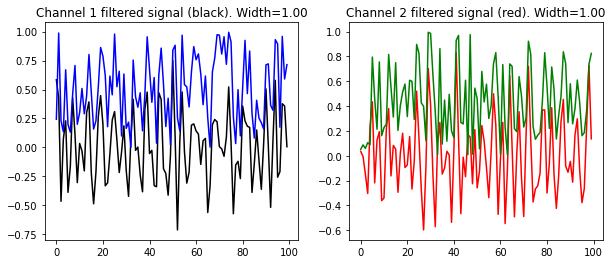

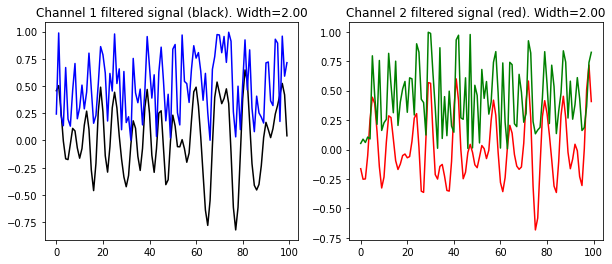

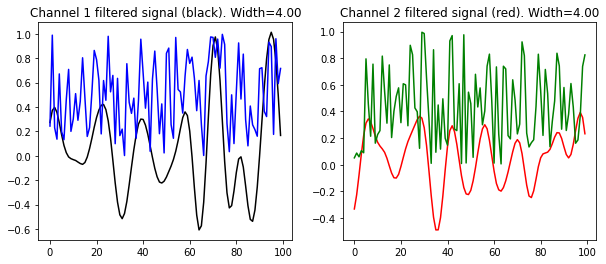

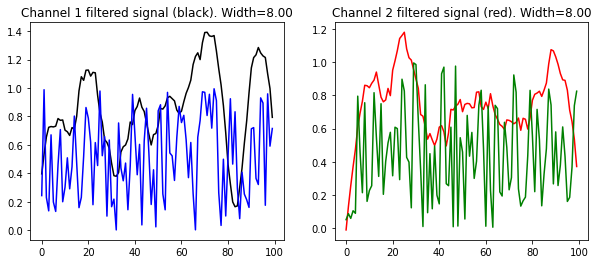

In [9]:
model = Sequential()
model.add(WaveletAnalysis(4, kernel_length=30, input_shape=(2, 100)))       
data = np.random.random((1, 2, 100)).astype('float32')
z = model.predict(data)
for i in range(4):
    plt.figure(figsize=(10,4))            
    plt.subplot(121)
    plt.plot(np.squeeze(z[0,0,:,i]), 'k')
    plt.plot(np.squeeze(data[:,0,:]), 'b')            
    plt.title('Channel 1 filtered signal (black). Width=%.2f' % model.layers[0].weights[0][i].numpy())
    plt.subplot(122)
    plt.plot(np.squeeze(z[0,1,:,i]), 'r')
    plt.plot(np.squeeze(data[:,1,:]), 'g')
    plt.title('Channel 2 filtered signal (red). Width=%.2f' % model.layers[0].weights[0][i].numpy())
    plt.show()